Note: you may need to restart the kernel to use updated packages.


c:\Users\Joaquin\miniconda3\envs\Señales\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


<bound method DataFrame.reset_index of                                     0
ECG_Rate_Mean                41.97729
HRV_MeanNN     [[1581.2972972972973]]
HRV_SDNN        [[781.3060598505294]]
HRV_SDANN1                    [[nan]]
HRV_SDNNI1                    [[nan]]
...                               ...
HRV_RCMSEn                    [[0.0]]
HRV_CD          [[1.915519628395222]]
HRV_HFD        [[2.0480406464895684]]
HRV_KFD         [[8.079481390097333]]
HRV_LZC        [[1.1263682952711243]]

[83 rows x 1 columns]>

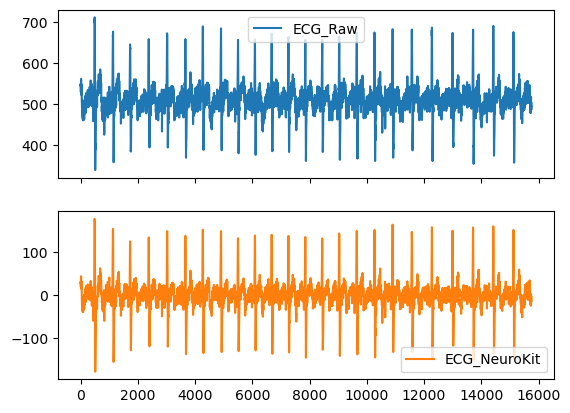

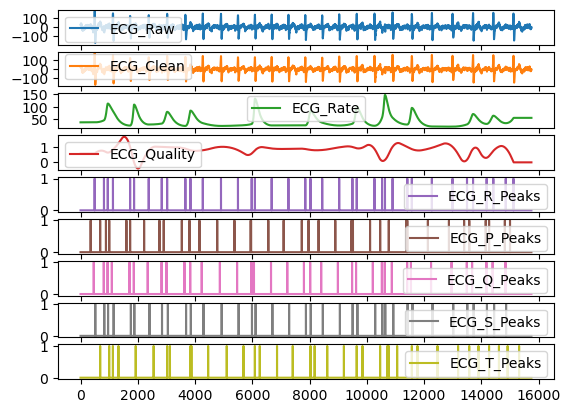

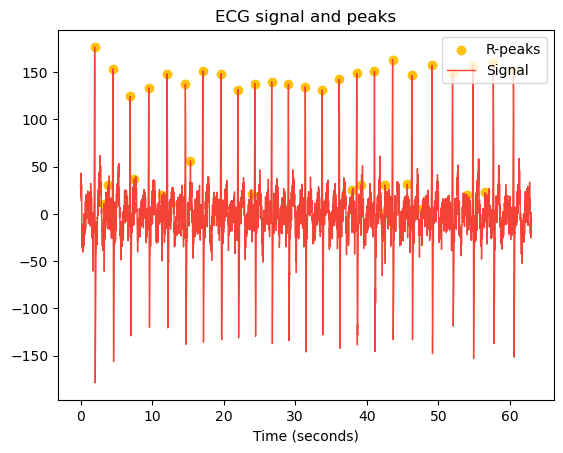

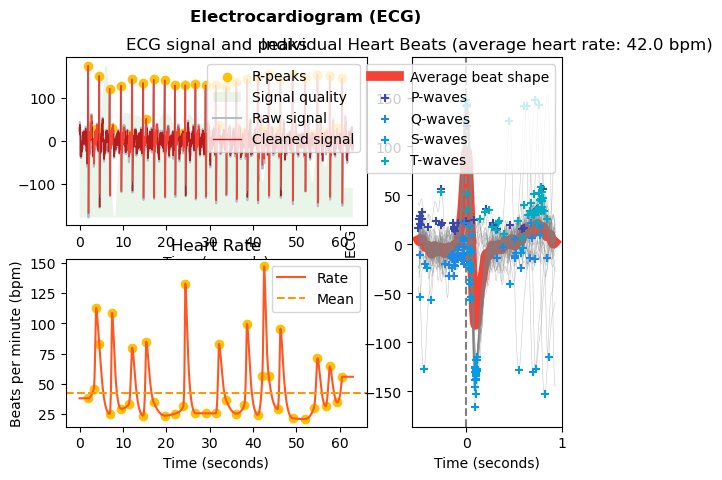

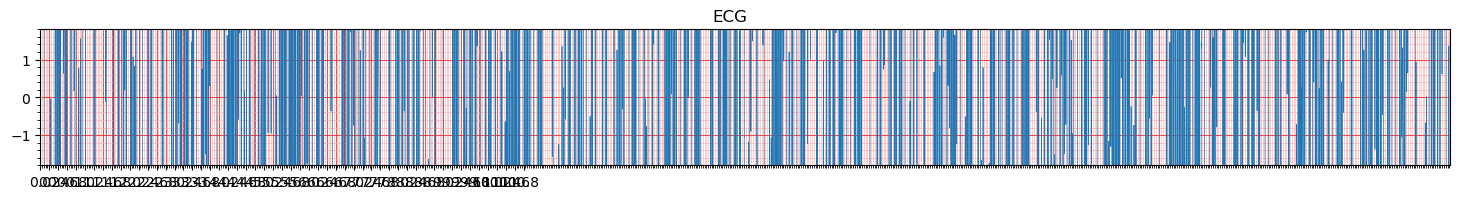

In [1]:
%pip install neurokit2 seaborn
!pip install neurokit2 ecg-plot

import neurokit2 as nk

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import ecg_plot

#ecg = nk.ecg_simulate(duration=10, sampling_rate=250, noise=0.2)

#ecg += np.random.normal(0, 0.1, len(ecg))

#ECG_CLEAN
ecg= np.loadtxt(r"C:\Users\Joaquin\Desktop\Repositorio Señales\ISB-Grupo-5\Otros\Archivos_varios\Lab5_ECG\RespD1.txt", comments='#',skiprows=4, usecols=5)
filtered= nk.ecg_clean(ecg, sampling_rate=250, method="neurokit")

signals = pd.DataFrame({
    "ECG_Raw" : ecg,
    "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=250, method="neurokit"),
    #"ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=250, method="biosppy"),
    #"ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985"),
    #"ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=250, method="hamilton2002"),
    #"ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010"),
    #"ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012"),
    #"ECG_VG" : nk.ecg_clean(ecg, sampling_rate=250, method="vg"),
    #"ECG_TC" : nk.ecg_clean(ecg, sampling_rate=250, method="templateconvolution")
})

signals.plot(subplots=True)

#ECG_PROCESS
signals, info = nk.ecg_process(filtered, sampling_rate=250)
signals2 = signals[["ECG_Raw","ECG_Clean","ECG_Rate","ECG_Quality","ECG_R_Peaks","ECG_P_Peaks","ECG_Q_Peaks","ECG_S_Peaks","ECG_T_Peaks"]]
signals2.plot(subplots=True)

#ANALYZE
analysis = nk.ecg_analyze(signals, sampling_rate=250, method='auto')
analysis = analysis.transpose().reset_index  
display(analysis)

#ECG Rpeaks
signalsR, info = nk.ecg_peaks(filtered, sampling_rate=250, correct_artifacts=True, show=True)

#ECG_PLOT
nk.ecg_plot(signals,info)
ecg_plot.plot_1(filtered)
plt.show()